# Regresión logística

Supongamos que trabajas en una universidad y quieres determinar la probabilidad de admision de cada postulante basado en los resultados de sus dos exámenes.
Tienes datos históricos sobre postulantes anteriores que puedes usar como datos de entrenamiento para la regresión logística (o clasificación). Para cada ejemplo de entrenamiento, se tiene el puntaje de dos exámenes y la decisión de si lo admitió o no.

La tarea es construir un modelo de clasificación que estime la probabilidad de admisión de un aplicante basado en los puntajes de los dos exámenes.

#### Configuración de tamaño de gráficos

In [4]:
options(repr.plot.width=5, repr.plot.height=4, scipen = 999)

#### Instalación y carga de paquetes necesarios

In [5]:
list.of.packages <- c('ggplot2')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(ggplot2)

#### Carga de datos

In [19]:
admission <- read.table(file = 'ex2data1.txt', header = TRUE, 
                        col.names = c('score1', 'score2', 'admitted'), sep = ",", dec = ".")

## Exploración de datos

In [20]:
head(admission)
admission$admitted <- factor(admission$admitted, levels = c(1, 0), labels = c('Admitido', 'No admitido'))
str(admission)

score1,score2,admitted
30.28671,43.89500,0
35.84741,72.90220,0
60.18260,86.30855,1
79.03274,75.34438,1
45.08328,56.31637,0
61.10666,96.51143,1


'data.frame':	99 obs. of  3 variables:
 $ score1  : num  30.3 35.8 60.2 79 45.1 ...
 $ score2  : num  43.9 72.9 86.3 75.3 56.3 ...
 $ admitted: Factor w/ 2 levels "Admitido","No admitido": 2 2 1 1 2 1 1 1 1 2 ...


## Visualización de datos

### Gráfico de dispersión

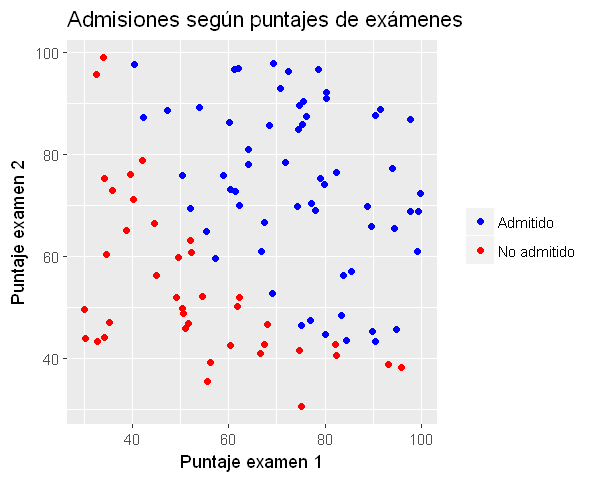

In [21]:
ggplot(data = admission, aes(x = score1, y = score2, col = admitted)) + geom_point() +
    labs(x = 'Puntaje examen 1', y = 'Puntaje examen 2') + ggtitle('Admisiones según puntajes de exámenes') +
    theme(legend.title=element_blank()) +
    scale_colour_manual(name='', values=c('Admitido'='blue', 'No admitido'='red'))

A simple vista vemos que podemos separar ambas clases por medio de una línea recta. O por una función cuadrática pero por simplicidad en este ejemplo lo haremos por una función lineal.

#### Preparamos los datos para la regresión

In [22]:
X <- admission$score1
X <- cbind(X, admission$score2)

y <- 2 - as.integer(admission$admitted)

#### Chequeamos las primeras 10 observaciones

In [23]:
head(X,10)
head(y,10)

X,
30.28671,43.89500
35.84741,72.90220
60.18260,86.30855
79.03274,75.34438
45.08328,56.31637
61.10666,96.51143
75.02475,46.55401
76.09879,87.42057
84.43282,43.53339
95.86156,38.22528


[1] 0 0 1 1 0 1 1 1 1 0

#### Almacenamos la cantidad de observaciones (m) y la cantidad de atributos de entrada (n)

In [24]:
m <- nrow(X)
n <- ncol(X)
cat('Cantidad de ejemplos en los datos:', m)
cat('\nCantidad de atributos de entrada:', n)

Cantidad de ejemplos en los datos: 99
Cantidad de atributos de entrada: 2

#### Añadimos el término de intersección

In [25]:
X <- cbind(1, X)
head(X, 8)

,X,
1,30.28671,43.89500
1,35.84741,72.90220
1,60.18260,86.30855
1,79.03274,75.34438
1,45.08328,56.31637
1,61.10666,96.51143
1,75.02475,46.55401
1,76.09879,87.42057


#### Inicializamos los parámetros theta

In [26]:
initial_theta <- numeric(3)

#### Creamos la función sigmoidal

In [27]:
sigmoid <- function(z) {
  
  g <- 1 / (1 + exp(1) ^ (-z))
}

#### Construimos la función de costo y de gradientes

In [28]:
computeCost <- function(theta) {
    
    hyp <-  sigmoid(X %*% theta)
    J <- (-1 / m) * (t(y) %*% log(hyp) + (t((1 - y)) %*% log(1 - hyp)))
    J
}

computeGrad <- function(theta) {
    
    grad <- matrix(0,dim(as.matrix(theta)))
    m <- length(y)
    
    hyp <-  sigmoid(X %*% theta)
    grad <- (t(X) %*% (hyp - y)) / m
    
    grad
}

#### Calculamos el costo inicial

In [29]:
J <- computeCost(initial_theta)
grad <- computeGrad(initial_theta)

cat("Costo inicial con parámetros en 0: ", J)
cat('\nGradientes iniciales:', grad)

Costo inicial con parámetros en 0:  0.6931472
Gradientes iniciales: -0.1060606 -12.30539 -11.77067

#### Optimización
A diferencia de la regresión lineal en lugar de iterar para encontrar los valores óptimos de theta utilizaremos la función optim, tenemos que pasar como parámetros los valores iniciales de theta y las funciones de costo y gradiesntes.
Con la función optim no es necesario especificar el tamaño del "paso" del gradiente (alpha).

In [30]:
results_optim <- optim(par = initial_theta, fn = computeCost, gr = computeGrad, method="BFGS", control = list(maxit = 400))
theta <- results_optim$par
J <-  results_optim$value

cat("Los valores óptimos de theta son: ", theta)
cat("\nEl valor final del costo es: ", J)
cat("\nLa ecuación final es: ", theta[1], "+", theta[2], "x score1 +", theta[3], "x score2")

Los valores óptimos de theta son:  -24.87226 0.2034023 0.1998984
El valor final del costo es:  0.2045574
La ecuación final es:  -24.87226 + 0.2034023 x score1 + 0.1998984 x score2

### Graficamos los datos y la frontera que separa a las clases

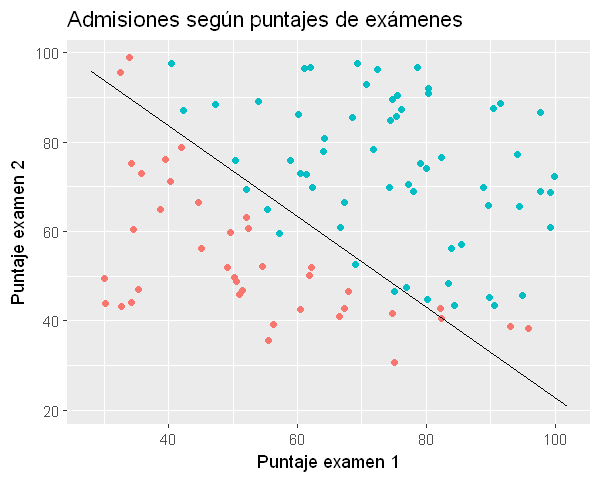

In [31]:
#Ahora dibujamos la recta que divide ambos grupos
if(ncol(X) <= 3) {
  
  #necesitamos dos puntos para dibujar la recta
  plot_x <- c(min(X[,2])-2, max(X[,2])+2) #posicion de puntos segun eje x
  plot_y <- (-1/theta[3])*(theta[2]*plot_x + theta[1]) #posicion de puntos segun eje y
  
}
ggplot() + geom_point(aes(x = X[,2], y = X[,3], col = factor(y))) +
    geom_line(aes(x = plot_x, y= plot_y)) +
    labs(x = 'Puntaje examen 1', y = 'Puntaje examen 2') + ggtitle('Admisiones según puntajes de exámenes') +
    theme(legend.title=element_blank()) + theme(legend.position="none")


Ahora si quisieramos por ejemplo predecir la probabilidad de ser admitido de un estudiante con puntaje de 45 en el examen 1 y puntaje 85 en el examen 2 lo haríamos de la siguiente manera:

In [33]:
notas <- c(1, 45, 85) #el 1 es el término de intercepto (siempre es 1)
prob <- sigmoid(notas %*% theta)

cat('Probabilidades de ser admitido:', round(prob *100,2))

Probabilidades de ser admitido: 78.11

Los puntos por encima a la linea corresponde a alumnos admitidos y los que estan por debajo corresponden a combinaciones de puntajes de alumnos no admitidos.

### Predicciones y precisión:
Ahora realizamos las predicciones con los parámetros obtenidos y vemos que tan exacto es nuestro clasificador.

In [34]:
predicciones <- round(sigmoid(X %*% theta))
table(valores.observados = y, predicciones)

                  predicciones
valores.observados  0  1
                 0 33  6
                 1  5 55

En una prueba rápida podemos ver que 11 alumnos fueron mal clasificados por nuestro modelo de regresión logistica.

In [35]:
cat('Precisión:', round(mean(round(sigmoid(X %*% theta)) == y) *100, 2))

Precisión: 88.89